In [41]:
import pandas as pd
import xgboost as xgb
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [42]:
data_path='./data1.xlsx'
data = pd.read_excel(data_path)
data['性别'] = data['性别'].apply(lambda x:1 if x == '男'  else 0)
data['获奖情况'] = data['获奖情况'].apply(lambda x: 1 if x == '校级奖学金' else (2 if x == '国家奖学金' else (3 if x == '社会奖学金' else 0)))
data.head()


,Unnamed: 0,性别,专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,...,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖,“双培计划”学习进步奖,“双培计划”优秀学生干部,获奖情况
0,0,0,26,1,87.6327,1,72.15,4.0,0,18,...,1,0,0,0,0,0,0,0,0,1
1,1,0,26,2,89.9434,1,70.50,3.0,0,18,...,1,0,0,0,0,0,0,0,0,1
2,2,0,26,3,88.4667,1,NaN,NaN,0,18,...,1,0,0,0,0,0,0,0,0,1
3,3,1,52,2,86.3803,1,76.40,NaN,0,6,...,1,0,0,0,0,0,0,0,0,1
4,4,1,52,3,87.5455,1,NaN,5.0,0,6,...,1,0,0,0,0,0,0,0,0,1


In [43]:
X=data.iloc[:,1:25]
Y=data.iloc[:,25]

In [44]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: 获奖情况, dtype: int64

In [45]:
X.head()

,性别,专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,实践实习,...,青学之星,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖,“双培计划”学习进步奖,“双培计划”优秀学生干部
0,0,26,1,87.6327,1,72.15,4.0,0,18,1,...,0,1,0,0,0,0,0,0,0,0
1,0,26,2,89.9434,1,70.50,3.0,0,18,1,...,0,1,0,0,0,0,0,0,0,0
2,0,26,3,88.4667,1,NaN,NaN,0,18,1,...,0,1,0,0,0,0,0,0,0,0
3,1,52,2,86.3803,1,76.40,NaN,0,6,2,...,0,1,0,0,0,0,0,0,0,0
4,1,52,3,87.5455,1,NaN,5.0,0,6,2,...,0,1,0,0,0,0,0,0,0,0


In [46]:
X = X.drop('“双培计划”学习进步奖', axis=1)
X = X.drop('青学之星', axis=1)
X = X.drop('“双培计划”优秀学生干部', axis=1)
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)

In [47]:
X.head()

,性别,专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,实践实习,...,学术创新,文化活动,体育活动评价成绩,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖
0,0,26,1,87.6327,1,72.150000,4.000000,0,18,1,...,2,0,0,1,0,0,0,0,0,0
1,0,26,2,89.9434,1,70.500000,3.000000,0,18,1,...,2,0,0,1,0,0,0,0,0,0
2,0,26,3,88.4667,1,71.259305,9.723596,0,18,1,...,2,0,0,1,0,0,0,0,0,0
3,1,52,2,86.3803,1,76.400000,9.723596,0,6,2,...,1,0,5,1,0,0,0,0,0,0
4,1,52,3,87.5455,1,71.259305,5.000000,0,6,2,...,1,0,5,1,0,0,0,0,0,0


In [54]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=100)
X_train, X_test, y_train, y_test = X, X, Y, Y

In [55]:
xgb_train=xgb.DMatrix(X_train,label=y_train)
xgb_test=xgb.DMatrix(X_test,label=y_test)

In [56]:
import sklearn.metrics as metrics
def f1(preds, dtrain):
    y_train = dtrain.get_label() # 'numpy.ndarray'
    y_pred = [np.argmax(d) for d in preds]
    return 'f1', metrics.f1_score(y_train, y_pred, average='weighted')

In [122]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

params={
    'objective':'multi:softmax',
    'eta':0.1,
    'max_depth':7,
    'n_estimators':200,
    'num_class':4,
    'alpha': 0.6,
    'lambda': 1.3,
    'colsample_bytree':0.97,
    'min_child_weight':0.4,
    'gamma':0.015,
}

watchlist=[(xgb_train,'train'),(xgb_test,'test')]
# 设置训练轮次
# num_round=500
# bst=xgb.train(params,xgb_train,num_round,watchlist,feval=f1)
# bst = XGBClassifier(max_depth=7, learning_rate=0.1, n_estimators=200, gamma=0.015, 
# min_child_weight=0.4,colsample_bytree=0.97, seed=123, alpha=0.6, eta=0.1)
bst = XGBClassifier(max_depth=7, learning_rate=0.1, n_estimators=200,seed=1)
# bst.fit(X_train, y_train)
kfold = StratifiedKFold(n_splits=10, random_state=7,shuffle=True)
results = cross_val_score(bst, X_train, y_train, cv=kfold,scoring='f1_weighted')#对数据进行十折交叉验证--9份训练，一份测试
print(results)
print(results.mean())
# result=xgb.cv(params=params,dtrain=xgb_train,nfold=10,metrics='auc',
#              num_boost_round=400,early_stopping_rounds=500, as_pandas=True,seed=123,feval=f1)
# result.head()


[0.8170552  0.81812284 0.82692148 0.80757929 0.81697488 0.81045966
 0.81221298 0.82034343 0.81060111 0.81399781]
0.8154268670749453


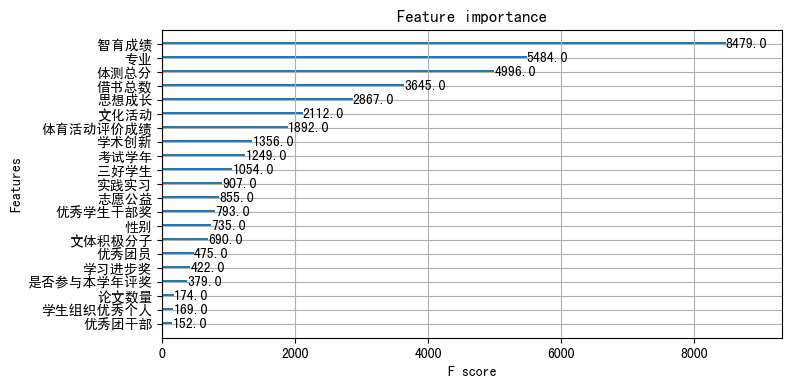

In [121]:
from xgboost import plot_importance #显示特征重要性
import matplotlib.pyplot as plt
plot_importance(bst)#打印重要程度结果。
plt.show()

In [110]:
# print(result.shape[0])
# print(result)
# import matplotlib.pyplot as plt
# plt.plot(range(1, 401), result['train-auc-mean'], 'k', label='Training Error')
# plt.plot(range(1, 401), result['test-auc-mean'], 'b', label='Test Error')
# plt.xlabel('Number of Trees')
# plt.ylabel('mlogloss')
# plt.axhline(0, linestyle='--', color='k', linewidth=1)
# plt.legend()
# plt.title('CV Errors for XGBoost')
# plt.show()


In [111]:
pred=bst.predict(X_test)
print(pred)

[1 0 1 ... 1 0 0]


In [112]:
#模型评估

error_rate=np.sum(pred!=y_test)/y_test.shape[0]

print('测试集错误率(softmax):{}'.format(error_rate))

accuray=1-error_rate
print('测试集准确率：%.4f' %accuray)
print('F1-score：',metrics.f1_score(y_test, pred, average='weighted'))

测试集错误率(softmax):0.1565982404692082
测试集准确率：0.8434
F1-score： 0.8302940868144537


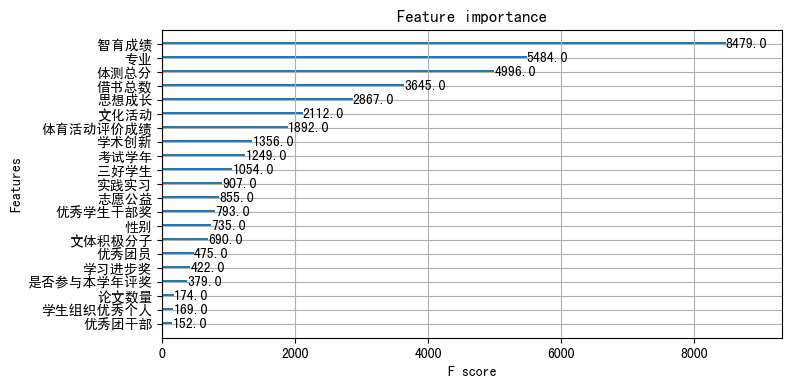

In [96]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["SimHei"]
xgb.plot_importance(bst)
plt.rcParams['figure.figsize'] = [8, 4]
plt.show()